In [10]:
import sys
import os

# Add the root directory of your project to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

##### Import Required Libraries:

##### Load Data:

In [8]:
import pandas as pd
import os

def load_data(data_folder):
    """
    Load all CSV files from the specified folder, combine them into one DataFrame,
    and clean the data by converting the 'date' column to datetime and dropping NaNs.
    """
    # Get a list of all CSV files in the folder
    all_files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]
    if not all_files:
        raise FileNotFoundError(f"No CSV files found in the folder: {data_folder}")
    
    # Read and combine all CSV files
    df_list = [pd.read_csv(os.path.join(data_folder, file)) for file in all_files]
    combined_df = pd.concat(df_list, ignore_index=True)
    
    # Convert 'date' column to datetime
    if 'date' in combined_df.columns:
        combined_df['date'] = pd.to_datetime(combined_df['date'], errors='coerce')
        combined_df = combined_df.dropna(subset=['date'])  # Remove rows with invalid dates
    
    print(f"Loaded and combined {len(all_files)} CSV files.")
    return combined_df

# Define folder path
data_folder = '/Users/HP 830 G6/Desktop/KAIM/week-1/data'

# Load the data
stock_data = load_data(data_folder)

# Display the first few rows of the data
print(stock_data.head())


Loaded and combined 7 CSV files.
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


##### Calculate Technical Indicators:

In [19]:
import pandas as pd
import os

def load_data(data_folder):
    """
    Load all CSV files from the specified folder, combine them into one DataFrame,
    and clean the data by converting the 'date' column to datetime and dropping NaNs.
    """
    all_files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]
    if not all_files:
        raise FileNotFoundError(f"No CSV files found in the folder: {data_folder}")
    
    # Read and combine all CSV files
    df_list = [pd.read_csv(os.path.join(data_folder, file)) for file in all_files]
    combined_df = pd.concat(df_list, ignore_index=True)
    
    # Convert 'date' column to datetime
    if 'date' in combined_df.columns:
        combined_df['date'] = pd.to_datetime(combined_df['date'], errors='coerce')
        combined_df = combined_df.dropna(subset=['date'])  # Remove rows with invalid dates
    
    print(f"Loaded and combined {len(all_files)} CSV files.")
    return combined_df

def calculate_sma(df, column, window):
    df['SMA'] = df[column].rolling(window=window).mean()
    return df

def calculate_rsi(df, column, window):
    delta = df[column].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    return df

def calculate_macd(df, column, short_window, long_window, signal_window):
    short_ema = df[column].ewm(span=short_window, adjust=False).mean()
    long_ema = df[column].ewm(span=long_window, adjust=False).mean()
    
    df['MACD'] = short_ema - long_ema
    df['MACD_signal'] = df['MACD'].ewm(span=signal_window, adjust=False).mean()
    return df

# Define folder path
data_folder = '/Users/HP 830 G6/Desktop/KAIM/week-1/data'

# Load the data
stock_data = load_data(data_folder)

# Check available columns and handle missing 'close' column
print("Available columns:", stock_data.columns.tolist())

if 'close' not in stock_data.columns:
    raise ValueError("The DataFrame does not contain a 'close' column required for calculations.")

# Calculate technical indicators
stock_data = calculate_sma(stock_data, column='close', window=14)
stock_data = calculate_rsi(stock_data, column='close', window=14)
stock_data = calculate_macd(stock_data, column='close', short_window=12, long_window=26, signal_window=9)

# Display the first few rows to verify the indicators are added
print(stock_data.head())



Loaded and combined 7 CSV files.
Available columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']


ValueError: The DataFrame does not contain a 'close' column required for calculations.

##### Visualize the Data:

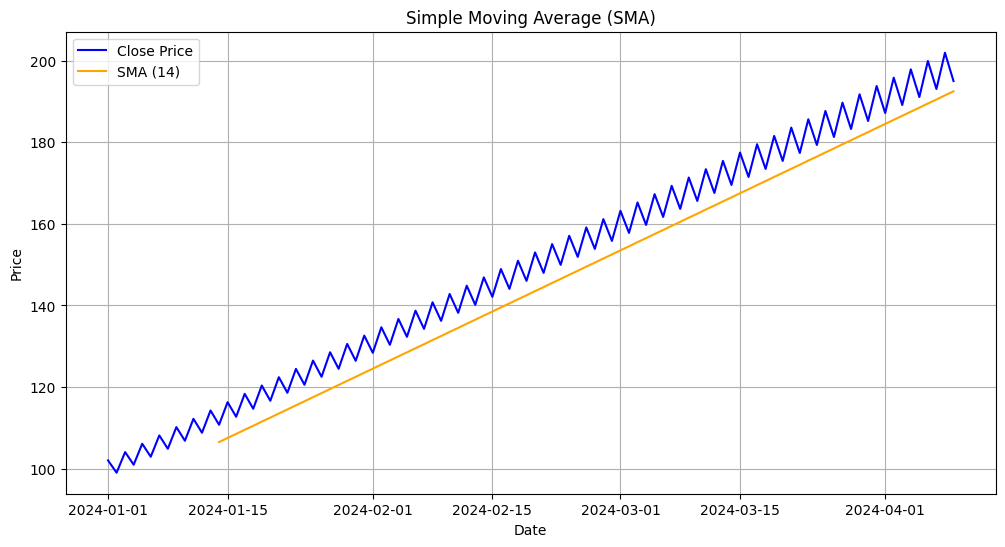

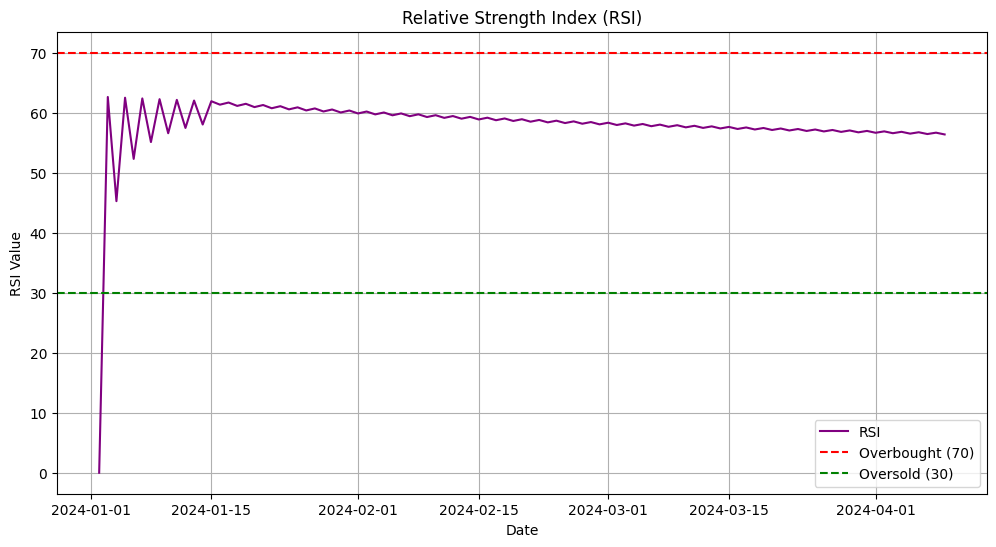

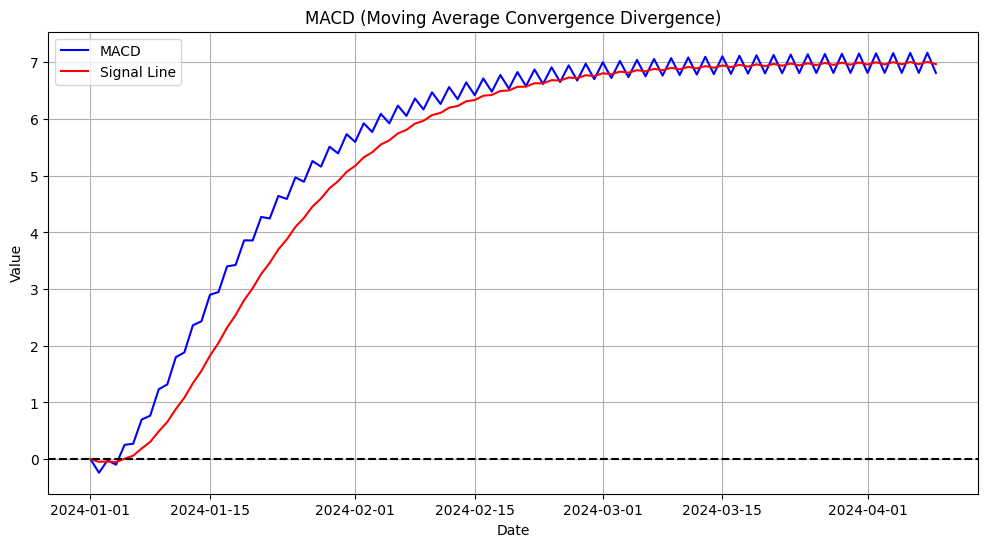

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_sma(df, column, window):
    """
    Calculate Simple Moving Average (SMA).
    """
    df['SMA'] = df[column].rolling(window=window).mean()
    return df

def calculate_rsi(df, column, window):
    """
    Calculate Relative Strength Index (RSI).
    """
    delta = df[column].diff(1)  # Calculate price changes
    gain = delta.where(delta > 0, 0)  # Keep gains, set losses to 0
    loss = -delta.where(delta < 0, 0)  # Keep losses as positive values, set gains to 0
    
    # Calculate rolling averages of gain and loss
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    # Calculate RSI
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    return df

def calculate_macd(df, column, short_window, long_window, signal_window):
    """
    Calculate MACD (Moving Average Convergence Divergence).
    """
    # Calculate short-term and long-term EMAs
    short_ema = df[column].ewm(span=short_window, adjust=False).mean()
    long_ema = df[column].ewm(span=long_window, adjust=False).mean()
    
    # Calculate MACD and Signal Line
    df['MACD'] = short_ema - long_ema
    df['MACD_signal'] = df['MACD'].ewm(span=signal_window, adjust=False).mean()
    return df

def plot_indicators(df):
    """
    Plot SMA, RSI, and MACD for visual analysis.
    """
    # Plot SMA
    plt.figure(figsize=(12, 6))
    plt.plot(df['date'], df['close'], label='Close Price', color='blue')
    plt.plot(df['date'], df['SMA'], label='SMA (14)', color='orange')
    plt.title('Simple Moving Average (SMA)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot RSI
    plt.figure(figsize=(12, 6))
    plt.plot(df['date'], df['RSI'], label='RSI', color='purple')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    plt.title('Relative Strength Index (RSI)')
    plt.xlabel('Date')
    plt.ylabel('RSI Value')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot MACD
    plt.figure(figsize=(12, 6))
    plt.plot(df['date'], df['MACD'], label='MACD', color='blue')
    plt.plot(df['date'], df['MACD_signal'], label='Signal Line', color='red')
    plt.axhline(0, color='black', linestyle='--')
    plt.title('MACD (Moving Average Convergence Divergence)')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.show()

# Example Usage
# Assuming stock_data has columns: 'date', 'close'

# Generate sample data
data = {
    'date': pd.date_range(start='2024-01-01', periods=100),
    'close': [i + (i * 0.02 * (-1)**i) for i in range(100, 200)]  # Example close prices
}
stock_data = pd.DataFrame(data)

# Calculate indicators
stock_data = calculate_sma(stock_data, column='close', window=14)
stock_data = calculate_rsi(stock_data, column='close', window=14)
stock_data = calculate_macd(stock_data, column='close', short_window=12, long_window=26, signal_window=9)

# Plot the indicators
plot_indicators(stock_data)


##### Save/Commit Results

In [27]:
# Save the plots to files
plt.savefig('sma_plot.png')  # Save the SMA plot
plt.savefig('rsi_plot.png')  # Save the RSI plot
plt.savefig('macd_plot.png')  # Save the MACD plot

<Figure size 640x480 with 0 Axes>

##### Implement PyNance for Financial Metrics:

In [ ]:
import yfinance as yf

# Create a Ticker object using the desired stock symbol (e.g., 'AAPL' for Apple)
ticker = "AAPL"
stock = yf.Ticker(ticker)

# Get stock information (this contains various financial metrics)
stock_info = stock.info

# Extract specific financial metrics
pe_ratio = stock_info.get('trailingPE', 'N/A')
dividend_yield = stock_info.get('dividendYield', 'N/A')

# Display the financial metrics
print(f"P/E Ratio: {pe_ratio}")
print(f"Dividend Yield: {dividend_yield}")

